In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Fornberg formula in python
#  Input Parameters
#    z            -  location where approximations are to be accurate
#    x(0:nd)      -  grid point locations, found in x(0:n)
#    nd           -  dimension of x- and c-arrays in calling
#                    program x(0:nd) and c(0:nd, 0:m), respectively
#    m            -  highest derivative for which weights are sought
#
#  Output Parameter
#    c(0:nd,0:m)  -  weights at grid locations x(0:n) for
#                    derivatives of order 0:m, found in c(0:nd, 0:m)
#
#  References:
#      Generation of Finite Difference Formulas on Arbitrarily
#          Spaced Grids, Bengt Fornberg,
#          Mathematics of compuation, 51, 184, 1988, 699--706,
#          doi: 10.1090/S0025-5718-1988-0935077-0

def weights(z, x, nd, m):
    c1 = 1
    c4 = x[0] - z
    c = np.zeros((nd+1, m+1))
    c[0, 0] = 1
    for i in range(1, nd+1):
        mn = min(i, m)
        c2 = 1
        c5 = c4
        c4 = x[i] - z
        for j in range(0, i):
            c3 = x[i] - x[j]
            c2 = c2*c3
            if j == i-1:
                for k in range(mn, 0, -1):
                    c[i, k] = c1*(k*c[i-1, k-1] - c5*c[i-1, k])/c2
                c[i, 0] = -c1*c5*c[i-1, 0]/c2
            for k in range(mn, 0, -1):
                c[j, k] = (c4*c[j, k] - k*c[j, k-1])/c3
            c[j, 0] = c4*c[j, 0]/c3
        c1 = c2
    return c

In [3]:
def get_yprimes(nleft, m, x, y):
    """Return derivatives of ``y`` up to order ``m`` on grid ``x``.

    Parameters
    ----------
    nleft : int
        Number of stencil points to the left (right uses the same count).
    m : int
        Maximum derivative order. Valid range: ``0 <= m <= 2*nleft``.
    x : np.ndarray
        Grid points.
    y : np.ndarray
        Function values on ``x``.

    Returns
    -------
    derivs : np.ndarray
        Array with shape ``(m+1, npt)`` where ``derivs[p, j]`` is the
        ``p``-th derivative at ``x[j]``.
    """
    npt = len(x)
    nright = nleft
    nd = nleft+nright
    if m < 0 or m > nd:
        raise ValueError(f"m must satisfy 0 <= m <= {nd}, got {m}")

    derivs = np.zeros((m+1, npt))
    xsten = np.zeros(nd+1)
    for j in range(npt):
        z = x[j]
        if j-nleft < 0:
            j0 = 0
            j1 = nd+1
            xsten[0:nd+1] = x[j0:j1]
        elif j-nleft+nd+1 > npt-1:
            j1 = npt
            j0 = j1-nd-1
            xsten[0:nd+1] = x[j0:j1]
        else:
            j0 = j-nleft
            j1 = j0+nd+1
            xsten[0:nd+1] = x[j0:j1]

        c = weights(z, xsten, nd, m)
        for p in range(m+1):
            tmp = 0.
            for k in range(nd+1):
                tmp = tmp+c[k, p]*y[j0+k]
            derivs[p, j] = tmp
    return derivs


In [4]:
nleft = 3
m = 2

In [5]:
x = []
y = []
afile = open('EL_data.txt', 'r')
for line in afile:
    x.append(float(line.split()[0]))
    y.append(float(line.split()[1]))
afile.close()
x = np.array(x)
y = np.array(y)
derivs = get_yprimes(nleft, m, x, y)
y1, y2 = derivs[1, :], derivs[2, :]

In [6]:
fig = plt.figure(figsize=(12, 8))
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

<Figure size 1200x800 with 0 Axes>

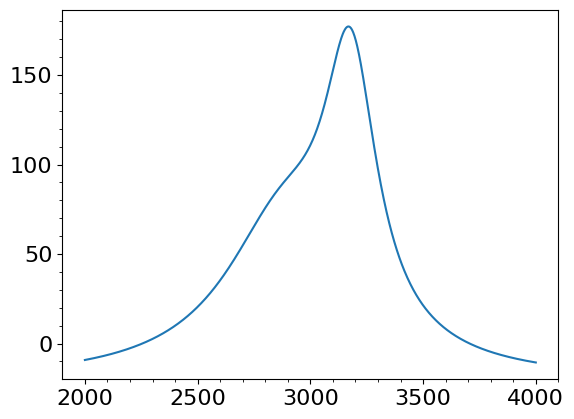

In [7]:
plt.plot(x, y)

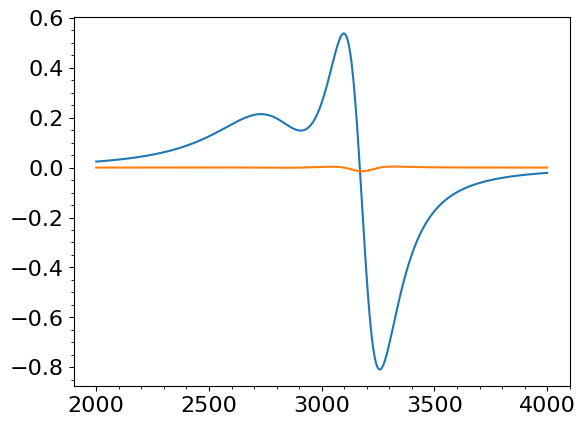

In [8]:
plt.plot(x, y1)
plt.plot(x, y2)

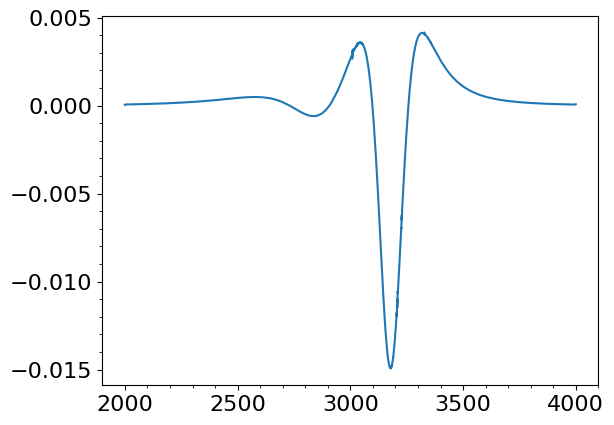

In [9]:
plt.plot(x, y2)

In [10]:
for j in range(len(x)):
    print(x[j], y[j], y1[j], y2[j])

2000.0 -9.2015 0.024064939403046215 4.50482219838122e-05
2002.22469 -9.14782 0.024202771000845696 7.090621389324592e-05
2004.44939 -9.0938 0.02436010061571399 6.872072521806397e-05
2006.67408 -9.03944 0.024508529467003923 6.589508037748229e-05
2008.89878 -8.98475 0.024660817380842345 7.12791647069222e-05
2011.12347 -8.92971 0.024819367874445733 7.067311792785178e-05
2013.34816 -8.87432 0.024976440253322255 7.064874670561008e-05
2015.57286 -8.81858 0.025133859714083315 7.081616521823972e-05
2017.79755 -8.76249 0.025290657253282514 7.040458391393764e-05
2020.02225 -8.70605 0.025450230836701337 7.305146531020115e-05
2022.24694 -8.64925 0.025612650898497236 7.266041790414748e-05
2024.47164 -8.59209 0.025773853108040687 7.257309126983136e-05
2026.69633 -8.53457 0.02593802695123039 7.49947711769193e-05
2028.92102 -8.47668 0.02610483385096133 7.468664090668972e-05
2031.14572 -8.41842 0.02627049504023936 7.457999218520028e-05
2033.37041 -8.35979 0.02643973060079559 7.721526400601003e-05
2035.5